<a href="https://colab.research.google.com/github/giftajayi/Machine-Learning-Projects/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

**Data Explaratory Analysis**

In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
# Observing the values of the airlines
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [4]:
# Observing the values of the source_city
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [5]:
# Observing the values of the destination_city
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [6]:
# Observing the values of the arrival_time
df['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [7]:
# Observing the values of the departure_time
df['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [8]:
# Observing the values of the stops
df['stops'].value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [9]:
# Observing the values of the class
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [10]:
df['duration'].min()

0.83

In [11]:
df['duration'].max()

49.83

In [12]:
df['duration'].median()

11.25

In [13]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

**Data Preprocessing**

In [14]:
""" Unnamed: 0' = drop
   'airline' = One hot encoding
   'flight' = drop
   'source_city'= One hot encoding
   'departure_time' = One hot encoding
   'stops' = Turn to a numerial feature from zero to two
   'arrival_time' = One hot encoding
   'destination_city' = One hot encoding
   'class' = Binary encoding
   'duration' = keep
    'days_left' = keep
    , 'price'] = keep
"""

" Unnamed: 0' = drop\n   'airline' = One hot encoding\n   'flight' = drop\n   'source_city'= One hot encoding\n   'departure_time' = One hot encoding\n   'stops' = Turn to a numerial feature from zero to two\n   'arrival_time' = One hot encoding\n   'destination_city' = One hot encoding\n   'class' = Binary encoding\n   'duration' = keep\n    'days_left' = keep\n    , 'price'] = keep\n"

In [15]:
# Drop columns
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['flight'], axis = 1)

In [16]:
# Binary encoding for class cloumn
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [17]:
# Factorizer for stops column
df.stops = pd.factorize(df.stops)[0]

In [18]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [19]:
# One hot encoding
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop(['airline'], axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype=int)).drop(['source_city'], axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest', dtype=int)).drop(['destination_city'], axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype=int)).drop(['departure_time'], axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype=int)).drop(['arrival_time'], axis=1)


In [20]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Training Regression Model**

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
X, y = df.drop(['price'], axis=1), df.price

In [23]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [24]:
y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
300148,69265
300149,77105
300150,79099
300151,81585


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

**Model Evaluation**

In [27]:
reg.score(X_test, y_test)

0.9849912244069985

In [28]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = reg.predict(X_test)

print('R2', r2_score(y_test, y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

R2 0.9849912244069985
RMSE 2781.5027891708874
MAE 1074.9196257648796
MSE 7736757.766165426


Text(0.5, 1.0, 'Actual vs Predicted Flight Prices')

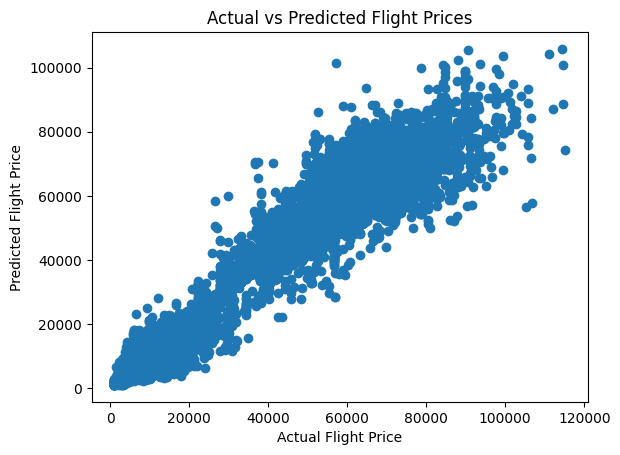

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')

In [30]:
importances = dict(zip(X.columns, reg.feature_importances_))
sorted_importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
sorted_importances

{'class': 0.8798051892049528,
 'duration': 0.05776403524138136,
 'days_left': 0.018505932784992567,
 'airline_Vistara': 0.0052595426121816655,
 'airline_Air_India': 0.0047062576898592254,
 'source_Delhi': 0.0037795305628372565,
 'dest_Delhi': 0.003487196191380985,
 'source_Mumbai': 0.0022863945296259544,
 'stops': 0.0019137314150608027,
 'dest_Mumbai': 0.0018921113557995761,
 'dest_Kolkata': 0.001805601422069066,
 'source_Kolkata': 0.0016982485728043873,
 'arrival_Evening': 0.0015196235022836755,
 'dest_Hyderabad': 0.0014978223166195188,
 'dest_Bangalore': 0.0012912167881943021,
 'source_Hyderabad': 0.0012494971108043254,
 'arrival_Night': 0.0011409959733636721,
 'source_Bangalore': 0.001089754329697375,
 'departure_Evening': 0.001082486236921726,
 'arrival_Afternoon': 0.0009710514553855845,
 'source_Chennai': 0.0008778432622780059,
 'departure_Morning': 0.000860837928415905,
 'dest_Chennai': 0.000834552424425651,
 'departure_Early_Morning': 0.0008027491767694271,
 'departure_Night': 0

<BarContainer object of 5 artists>

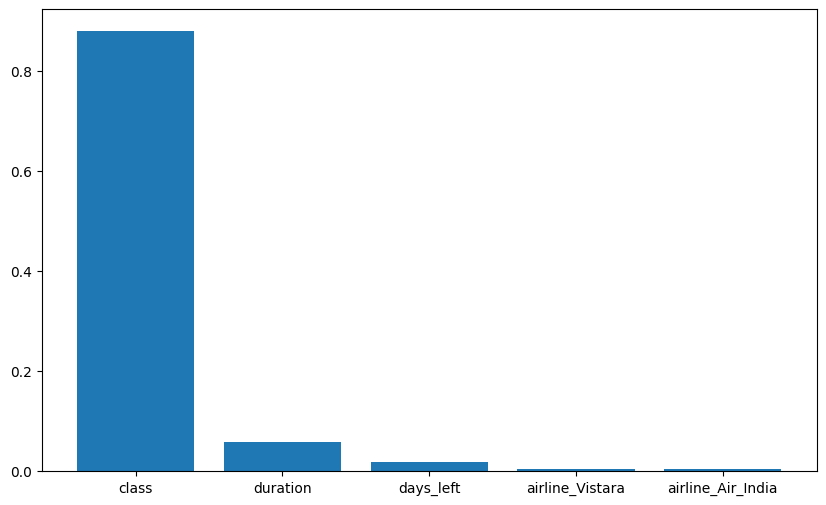

In [31]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in list(sorted_importances.items())[:5]], [x[1] for x in list(sorted_importances.items())[:5]])

**Hperparameter Tuning**

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)


random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_par

In [34]:
best_regressor.score(X_test, y_test)

0.9858997172020455

In [35]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2', r2_score(y_test, y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

R2 0.9858997172020455
RMSE 2696.0055331274125
MAE 1092.7233899147327
MSE 7268445.834653623


Text(0.5, 1.0, 'Actual vs Predicted Flight Prices')

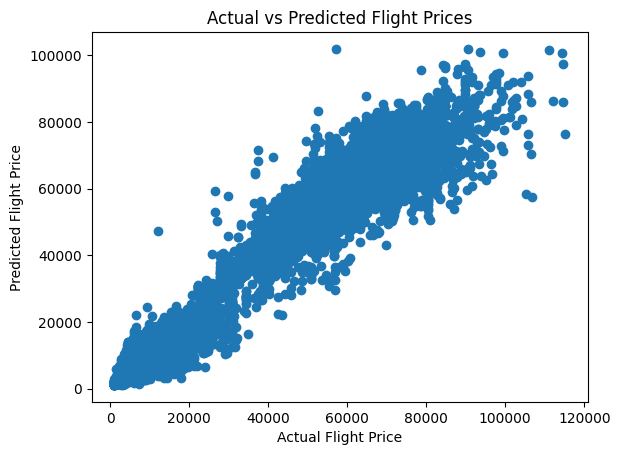

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')

In [39]:
best_regressor.predict(X_test)

array([ 7327.85376135, 70342.80423692,  6198.66699092, ...,
        6579.30390498,  3850.85779754, 73356.12283213])

In [ ]:
# model evalution f1 score
from sklear

**Saving the Model**

In [40]:
import joblib

# Save the model to a file
filename = 'flight_price_model.sav'
joblib.dump(best_regressor, filename)

['flight_price_model.sav']

In [41]:
import pandas as pd

# Get the model parameters as a dictionary
model_params = best_regressor.get_params()

# Create a pandas DataFrame from the parameters
params_df = pd.DataFrame([model_params])

# Save the DataFrame to a CSV file
params_df.to_csv('model_parameters.csv', index=False)

In [42]:
import pickle

# Save the model to a pickle file
filename = 'flight_price_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_regressor, file)